tensor([[[ 0.0000,  1.0000,  0.8415],
         [ 0.0303,  0.9998,  0.8550],
         [ 0.0606,  0.9992,  0.8683],
         [ 0.0908,  0.9982,  0.8813],
         [ 0.1209,  0.9967,  0.8940],
         [ 0.1509,  0.9949,  0.9064],
         [ 0.1808,  0.9927,  0.9182],
         [ 0.2105,  0.9900,  0.9296],
         [ 0.2401,  0.9870,  0.9404],
         [ 0.2694,  0.9835,  0.9506],
         [ 0.2984,  0.9797,  0.9601],
         [ 0.3272,  0.9754,  0.9688],
         [ 0.3557,  0.9708,  0.9766],
         [ 0.3838,  0.9657,  0.9834],
         [ 0.4116,  0.9603,  0.9893],
         [ 0.4391,  0.9544,  0.9939],
         [ 0.4661,  0.9482,  0.9973],
         [ 0.4927,  0.9416,  0.9994],
         [ 0.5188,  0.9346,  1.0000],
         [ 0.5445,  0.9272,  0.9990],
         [ 0.5696,  0.9195,  0.9963],
         [ 0.5943,  0.9114,  0.9917],
         [ 0.6184,  0.9028,  0.9852],
         [ 0.6419,  0.8940,  0.9766],
         [ 0.6648,  0.8847,  0.9658],
         [ 0.6872,  0.8752,  0.9526],
         [ 0

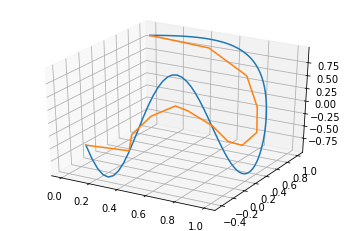

In [ ]:
#Signature methods are modern ML techniques which are capable of parsimoniously capturing path-dependence in complex systems.
#Example applications include exotic option pricing, volatility modelling, data-driven SDE discovery, econometric forecasting, and
#idenficiation of statistical arbitrage. The code below performs signature inversion to approximately recover a path from its truncated signature.
#Randomised signature, which overcomes the dimensionality limitations of signature, is tangentially explored too.

#!pip install signatory
import torch
import signatory
import numpy as np
import matplotlib.pyplot as plt

dt=0.01

X=np.linspace(0,1,int(1/dt))

X1=np.sin(3*X)
X2=np.cos(2*X)
X3=np.sin(np.exp(2.5*X))

U=np.stack((X1,X2,X3),axis=1)
X=torch.from_numpy(U).unsqueeze(0)
print(X)


fig=plt.figure()

ax=fig.add_subplot(111,projection='3d')
ax.plot(X1,X2,X3)

for i in range(13,14):
   sig=signatory.signature(X,i)
   Y=signatory.invert_signature(sig,i,X.shape[2],initial_position=X[:,0,:])
   Y=np.asarray(Y)
   ax.plot(Y[0,:,0],Y[0,:,1],Y[0,:,2])

def rSig(X,len,dim,k):
  rSig=np.array((dim,k))
  Z0=np.random.normal(0,1)
  A=[];b=[]
  for j in range(0,dim):
    A.append(np.random.normal(size=(k,k),loc=0,scale=1))
    b.append(np.random.normal(0,1))
  rSig[0]=Z0
  for i in range(len):
    rSig[i]=rSig[i-1]
    for j in range(dim):
      rSig[i]+=np.dot(A[i],rSig[i-1])+b[j]

